# Choose of smoother and parameter P

In [61]:
from bvclassificator.simulation import Profile
from skfda import FDataGrid
from skfda.exploratory.stats import mean
from skfda.preprocessing.smoothing import KernelSmoother
import numpy as np
import matplotlib.pyplot as plt
from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch
from skfda.misc.hat_matrix import NadarayaWatsonHatMatrix, KNeighborsHatMatrix
from skfda.preprocessing.smoothing.validation import LinearSmootherGeneralizedCVScorer, LinearSmootherLeaveOneOutScorer

In [76]:
profile_list = []
for _ in range(9):
    c = Profile(x=0,
            y=0,
            time_period=60,
            fps=1)
    c.simulate(loc=0,
          scale=1,
          with_noise=True,
          label=1,
          tau=5,
          h=0.95)
    profile_list.append(c)

for _ in range(50*50-9):
    c = Profile(x=0,
            y=0,
            time_period=60,
            fps=1)
    c.simulate(loc=0,
          scale=1,
          with_noise=True,
          label=1,
          tau=0,
          h=0.95)
    profile_list.append(c)

In [77]:
matrix, index = generate_defect(dimension=DIMENSION,
                                            defect_dimension=2,
                                            v_width=2,
                                            h_width=2)

grid = Lattice(dimension=DIMENSION,
               time_period=60,
               fps=1,
               simulation=True,
               id_="prova",
               run="prova")

grid.build(profile_list=create_list(index))

grid.init_algo(n=5,
               k=2,
               p=2,
               b=2)

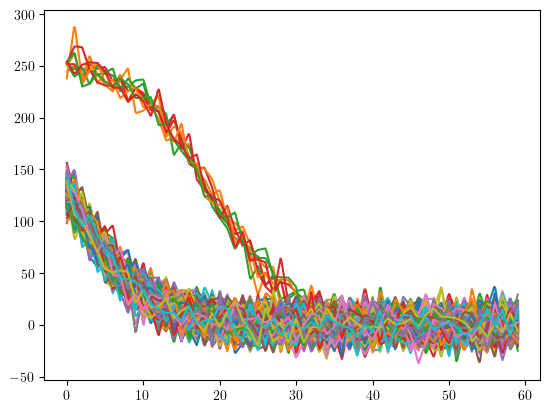

In [78]:
grid.func_object.plot()
plt.show()

## FPCA

In [79]:
grid.build_func_repr(1.5)

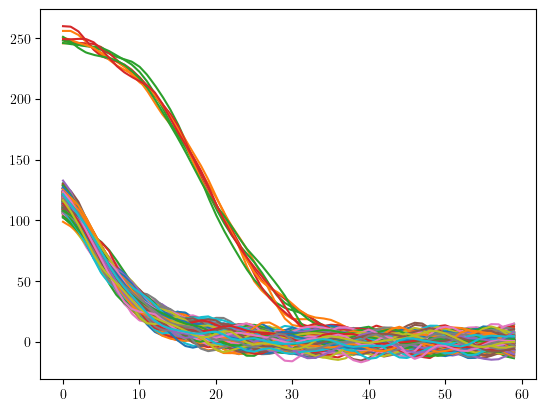

In [81]:
grid.func_object.plot()
plt.show()

In [85]:
fpca = FPCA(n_components=20)
fpca.fit(grid.func_object)

FPCA(_weights=array([0.33333333, 1.33333333, 0.66666667, 1.33333333, 0.66666667,
       1.33333333, 0.66666667, 1.33333333, 0.66666667, 1.33333333,
       0.66666667, 1.33333333, 0.66666667, 1.33333333, 0.66666667,
       1.33333333, 0.66666667, 1.33333333, 0.66666667, 1.33333333,
       0.66666667, 1.33333333, 0.66666667, 1.33333333, 0.66666667,
       1.33333333, 0.66666667, 1.33333333, 0.66666667, 1.33333333,
       0.66666667, 1.33333333, 0.66666667, 1.33333333, 0.66666667,
       1.33333333, 0.66666667, 1.33333333, 0.66666667, 1.33333333,
       0.66666667, 1.33333333, 0.66666667, 1.33333333, 0.66666667,
       1.33333333, 0.66666667, 1.33333333, 0.66666667, 1.33333333,
       0.66666667, 1.33333333, 0.66666667, 1.33333333, 0.66666667,
       1.33333333, 0.66666667, 1.25      , 1.        , 0.41666667]),
     n_components=20)

In [86]:
fpca.explained_variance_ratio_

array([9.22346326e-01, 8.68075172e-03, 8.47444780e-03, 7.54339215e-03,
       6.95461356e-03, 6.00321905e-03, 5.86711833e-03, 4.90429708e-03,
       4.59450120e-03, 4.11110798e-03, 3.62172087e-03, 2.88513310e-03,
       2.54510336e-03, 2.26222016e-03, 1.72990116e-03, 1.63031843e-03,
       1.09681220e-03, 1.07079320e-03, 8.61453935e-04, 7.02170150e-04])

In [87]:
np.cumsum(fpca.explained_variance_ratio_)

array([0.92234633, 0.93102708, 0.93950153, 0.94704492, 0.95399953,
       0.96000275, 0.96586987, 0.97077417, 0.97536867, 0.97947978,
       0.9831015 , 0.98598663, 0.98853173, 0.99079395, 0.99252385,
       0.99415417, 0.99525098, 0.99632178, 0.99718323, 0.9978854 ])

In [88]:
np.cumsum(fpca.explained_variance_ratio_)[np.cumsum(fpca.explained_variance_ratio_)<0.95]+1

array([0.92234633, 0.93102708, 0.93950153, 0.94704492])